# Data Import

In [26]:
import pandas as pd

df = pd.read_csv("lawas/lawas-rainfall.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"],format="%Y-%m-%d %H:%M:%S")
df.set_index("DateTime",inplace=True)

In [27]:
print(df.head())

                     Rainfall (mm)  ANOM  Temperature  Dew Point  Humidity  \
DateTime                                                                     
2002-08-01 00:00:00            0.0  0.81         79.0       75.0      89.0   
2002-08-01 01:00:00            0.0  0.81         79.0       73.0      83.0   
2002-08-01 02:00:00            0.0  0.81         77.0       75.0      94.0   
2002-08-01 03:00:00            0.0  0.81         77.0       73.0      89.0   
2002-08-01 04:00:00            0.0  0.81         79.0       73.0      83.0   

                     Wind Speed  Pressure  Wind      Condition  
DateTime                                                        
2002-08-01 00:00:00         3.0     29.69     E  Mostly Cloudy  
2002-08-01 01:00:00         2.0     29.69     E  Mostly Cloudy  
2002-08-01 02:00:00         2.0     29.66     W  Mostly Cloudy  
2002-08-01 03:00:00         0.0     29.66  CALM  Mostly Cloudy  
2002-08-01 04:00:00         1.0     29.63    NE  Mostly Cloudy 

# Data Visualization

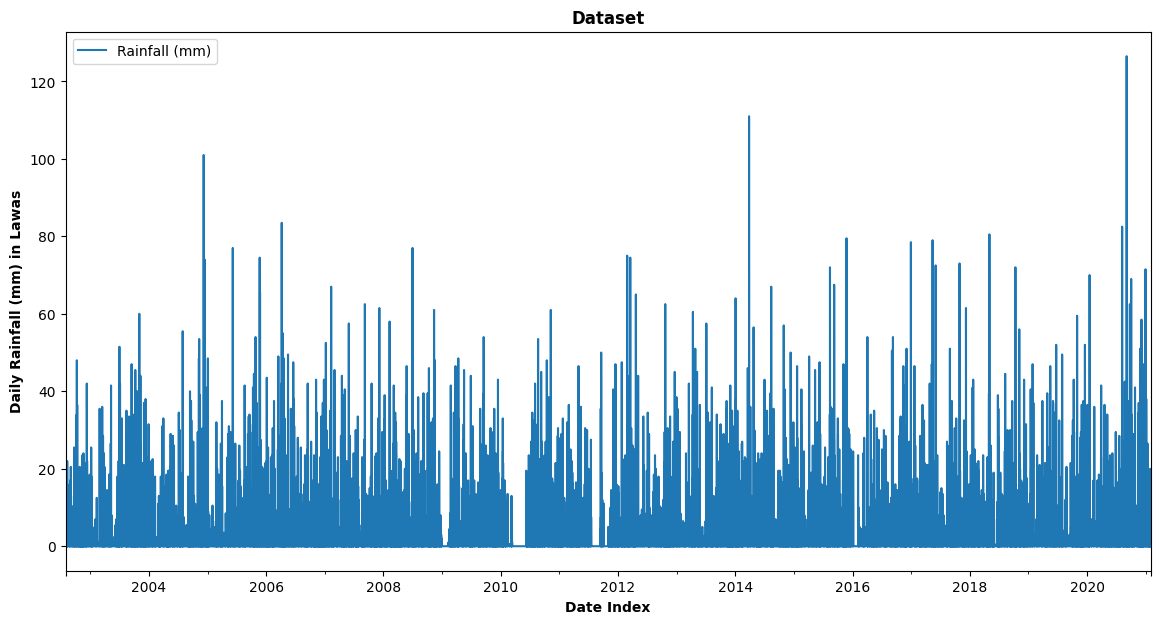

In [33]:
# Rainfall data
import matplotlib.pyplot as plt

df.reset_index().plot(x="DateTime", y="Rainfall (mm)",figsize=(14,7))
plt.ylabel('Daily Rainfall (mm) in Lawas',fontweight='bold')
plt.xlabel('Date Index',fontweight='bold')
plt.title('Dataset',fontweight='bold')
# plt.xlim(pd.Timestamp("2021-02-01"), pd.Timestamp("2022-02-01"))

plt.show()

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall (mm),162193.0,0.435053,2.876733,0.00,0.00,0.00,0.00,126.50
ANOM,162193.0,0.005896,0.836538,-1.69,-0.57,-0.03,0.48,2.71
Temperature,162193.0,82.201427,3.802638,70.00,79.00,82.00,84.00,95.00
Dew Point,162193.0,76.124247,2.121707,34.00,75.00,77.00,77.00,133.00
Humidity,162193.0,82.759253,9.914374,14.00,75.00,84.00,89.00,100.00
Wind Speed,162193.0,4.223145,3.348789,0.00,2.00,3.00,6.00,83.00
Pressure,162193.0,29.694080,0.092552,0.00,29.66,29.69,29.72,29.98


In [30]:
df.isnull().sum()

Rainfall (mm)    0
ANOM             0
Temperature      0
Dew Point        0
Humidity         0
Wind Speed       0
Pressure         0
Wind             0
Condition        0
dtype: int64

                     Rainfall (mm)  ANOM  Temperature  Dew Point  Humidity  \
DateTime                                                                     
2002-08-01 00:00:00            0.0  0.81         79.0       75.0      89.0   
2002-08-01 01:00:00            0.0  0.81         79.0       73.0      83.0   
2002-08-01 02:00:00            0.0  0.81         77.0       75.0      94.0   
2002-08-01 03:00:00            0.0  0.81         77.0       73.0      89.0   
2002-08-01 04:00:00            0.0  0.81         79.0       73.0      83.0   

                     Wind Speed  Pressure  
DateTime                                   
2002-08-01 00:00:00         3.0     29.69  
2002-08-01 01:00:00         2.0     29.69  
2002-08-01 02:00:00         2.0     29.66  
2002-08-01 03:00:00         0.0     29.66  
2002-08-01 04:00:00         1.0     29.63  


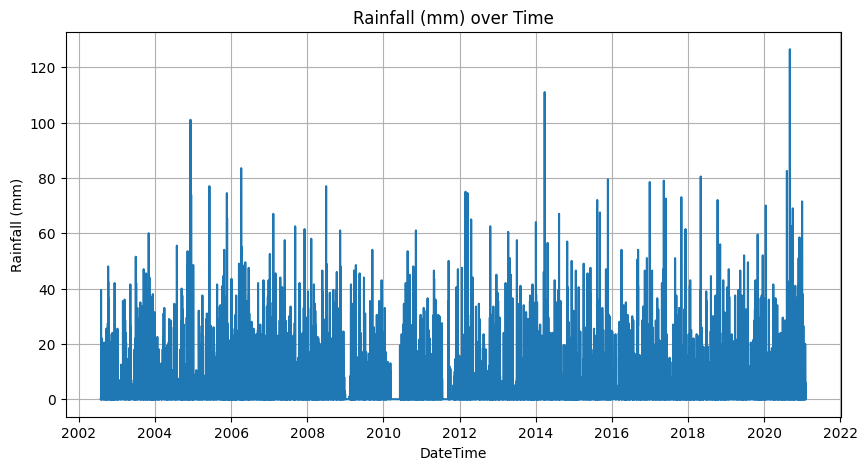

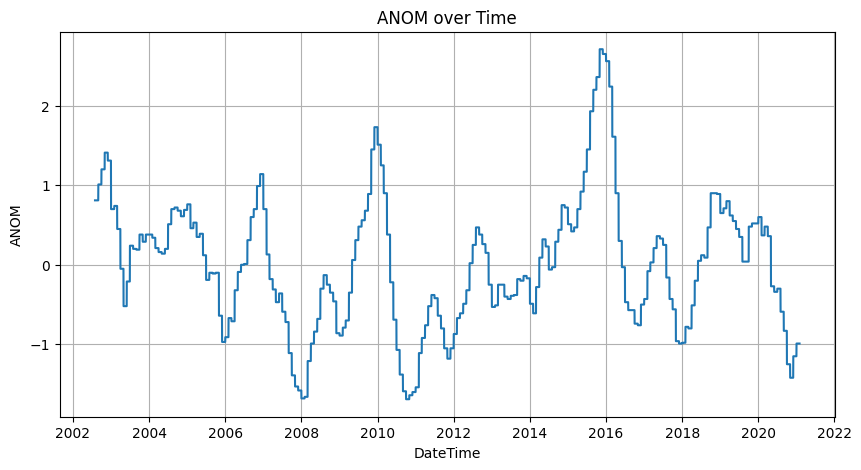

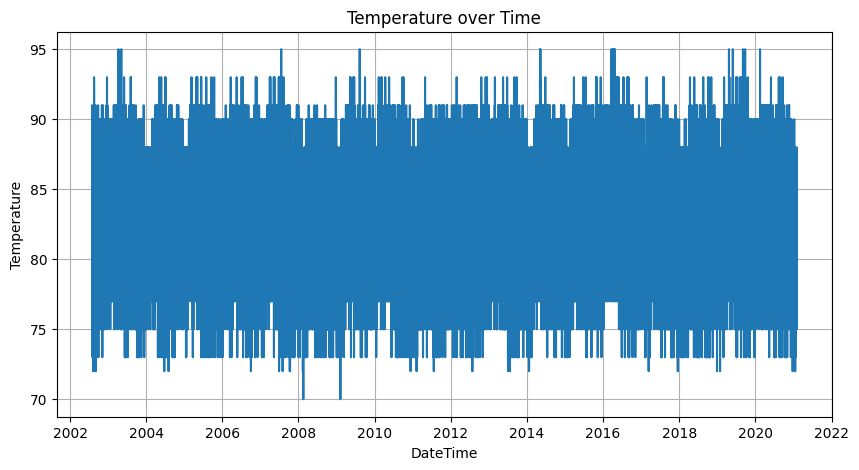

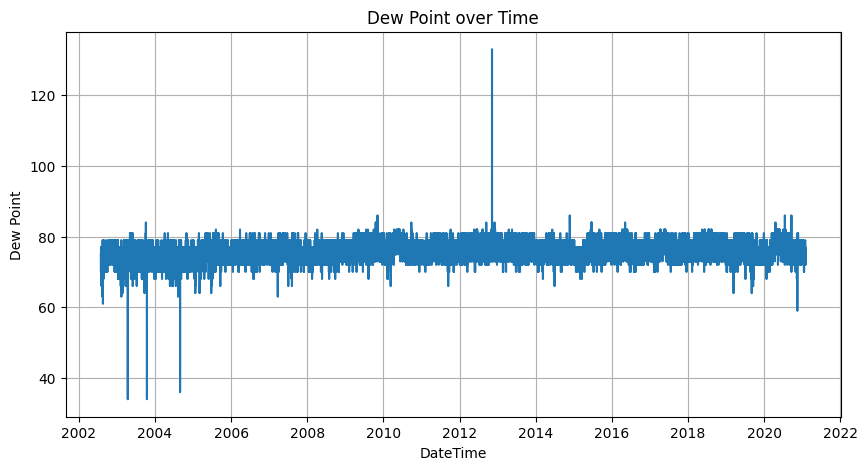

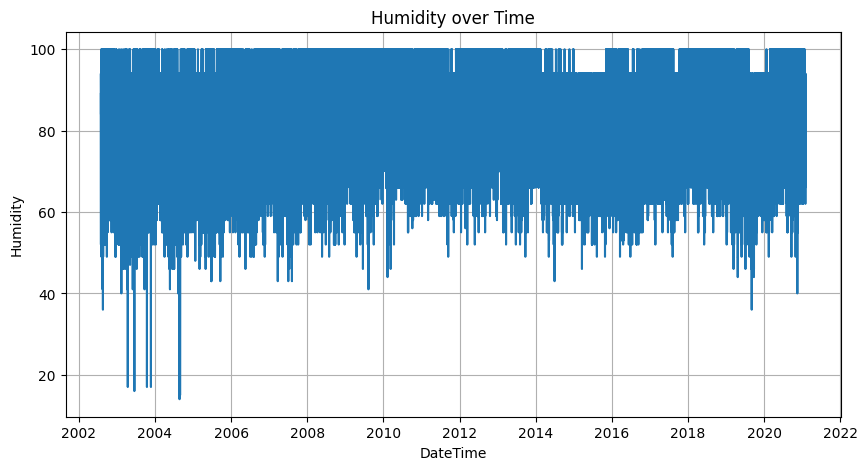

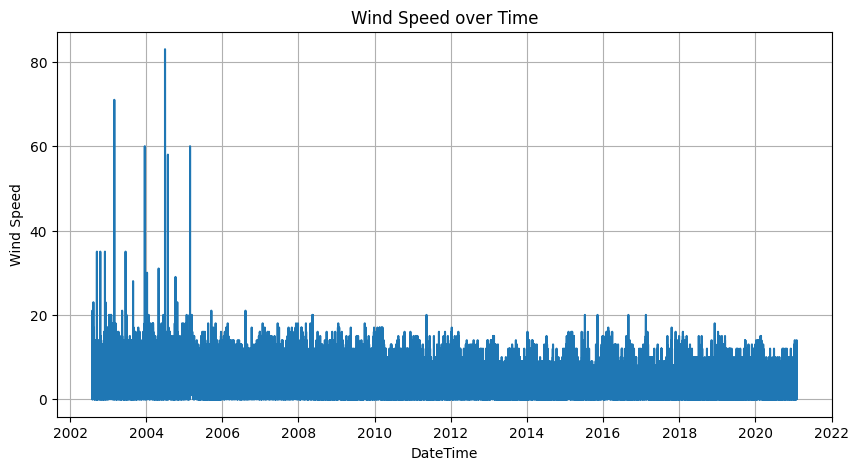

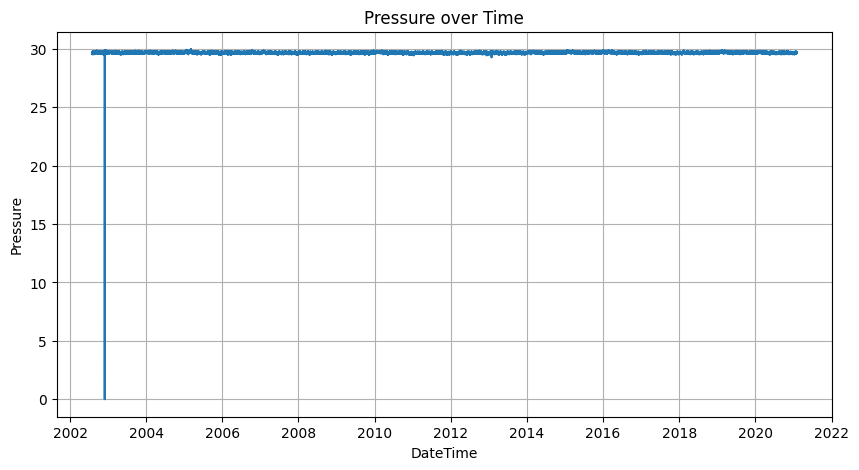

In [31]:
# Include only the numerical values
numerical_df = df.select_dtypes(include=['number'])

# Display the first few rows of the numerical dataframe
print(numerical_df.head())

for column in numerical_df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(numerical_df.index, numerical_df[column])
    plt.title(f'{column} over Time')
    plt.xlabel('DateTime')
    plt.ylabel(column)
    # plt.xlim(pd.Timestamp("2021-02-01"), pd.Timestamp("2022-02-01"))
    plt.grid(True)
    plt.show()

# LSTM Model Univariate

In [5]:
# new
df_uni = df.copy()
df_uni.drop(df_uni.iloc[:,1:9], axis=1, inplace=True)
df_uni

timesteps = 72
for lag in range(1, timesteps + 1):
    df_uni[f'Rainfall_lag{lag}'] = df_uni['Rainfall (mm)'].shift(lag)

df_uni = df_uni.dropna().reset_index(drop=True)

In [6]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

# df_uni = scaler.fit_transform(df_uni)
# X = scaler.fit_transform(df_uni.values[:, 1:])
# y = scaler.fit_transform(df_uni.values[:, 0].reshape(-1, 1))
df_uni = scaler.fit_transform(df_uni)
X = df_uni[:, 1:]
y = df_uni[:, 0]
X = X.reshape((X.shape[0], timesteps, 1))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


# model = Sequential([
#     LSTM(64, input_shape=(timesteps, 1)),
#     Dropout(0.2),
#     Dense(1, activation='relu')
# ])

model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=True),
    Dropout(0.2),
    Dense(1, activation='relu')
])

d:\Metocean\lstm-rainfall\.virt\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001)

model.compile(optimizer= "adam", loss='mae', metrics=['mse'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=300, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 60s 23ms/step - loss: 0.0035 - mse: 5.0504e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 2/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - loss: 0.0034 - mse: 4.9452e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 3/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - loss: 0.0034 - mse: 4.9323e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 4/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - loss: 0.0035 - mse: 5.1949e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 5/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - loss: 0.0033 - mse: 4.7247e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 6/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - loss: 0.0034 - mse: 4.9058e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 7/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - loss: 0.0034 - mse: 4.9012e-04 - val_loss: 0.0035 - val_mse: 5.3886e-04
Epoch 8/300
2486/2486 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - loss: 0.0034 - mse: 5.01

KeyboardInterrupt: 

1522/1522 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step
RMSE: 0.02480314553555817
R² Score: -0.021254178284276337


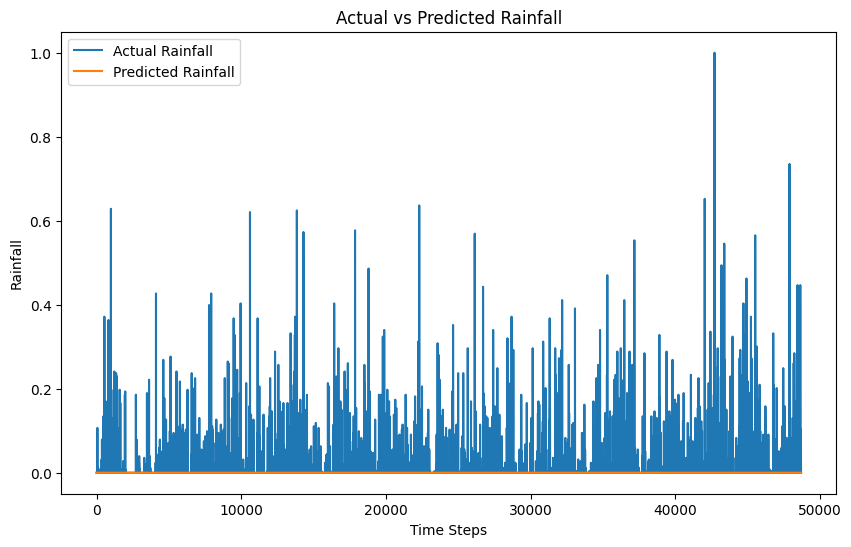

In [33]:
from sklearn.metrics import root_mean_squared_error,r2_score
import numpy as np
# Evaluate the model
y_pred = model.predict(X_test)

# Inverse transform to original scale
# y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df_uni.shape[1] - 1))], axis=1))[:, 0]
# y_pred_inv = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], df_uni.shape[1] - 1))], axis=1))[:, 0]

# bias = y_test_inv.mean() - y_pred_inv.mean()
# y_pred_inv_corrected = y_pred_inv + bias

# Calculate metrics
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Rainfall")
plt.plot(y_pred, label="Predicted Rainfall")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()

In [24]:
model.save("lstm_univariate.h5")

# CoPilot LSTM Model

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('lawas/lawas-rainfall.csv')

# Extract the "Rainfall (mm)" column
rainfall_data = data[['Rainfall (mm)']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_rainfall = scaler.fit_transform(rainfall_data)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 72
X, y = create_dataset(scaled_rainfall, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_actual[0], test_predict[:,0]))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[0], label='Actual')
plt.plot(test_predict[:,0], label='Predicted')
plt.title('Actual vs Predicted Rainfall')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Time Step')
plt.legend()
plt.show()

d:\Metocean\lstm-rainfall\.virt\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 352s 170ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 2/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 323s 159ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 3/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 325s 160ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 4/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 362s 178ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 5/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 359s 177ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 6/50
1921/2030 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - loss: 0.0033

KeyboardInterrupt: 

# LSTM Model Multivariate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()